# Assignment 1: Basic Image Classification

### 1. Dataset Exploration: Choose a simple image classification dataset (e.g., MNIST or Fashion-MNIST).Write code to load and visualize the dataset.

11490434/11490434 [==============================] - 39s 3us/step


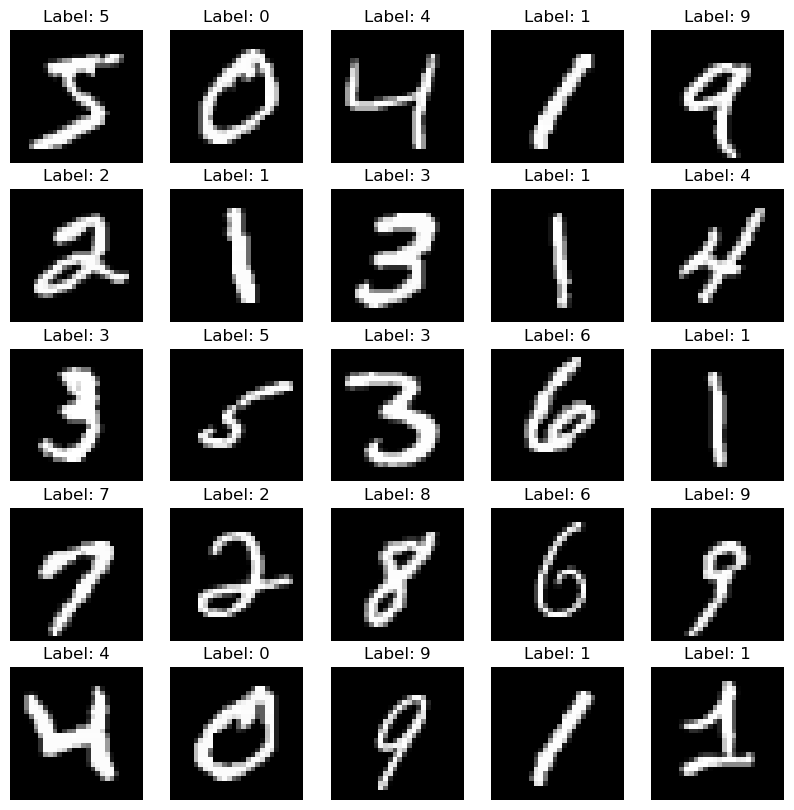

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Visualize some sample images from the training dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f'Label: {train_labels[i]}')
    plt.axis('off')
plt.show()

### 2. Implementing a Basic Model: Build a simple neural network using libraries like TensorFlow or PyTorch to classify the images. Train the model using the dataset and evaluate its accuracy.

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Set random seed for reproducibility
torch.manual_seed(42)

# Define the neural network architecture
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Define preferred device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load and preprocess the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Initialize the model, loss function, and optimizer
model = SimpleNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Save the trained model
torch.save(model.state_dict(), 'mnist_model.pth')

# Evaluate the model on the test dataset
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')

OSError: [WinError 182] The operating system cannot run %1. Error loading "C:\Users\shres\anaconda3\lib\site-packages\torch\lib\shm.dll" or one of its dependencies.

### 3. Visualization of Model Results: Create a program to visualize the model&#39;s predictions on test images, highlighting the correct and incorrect classifications.

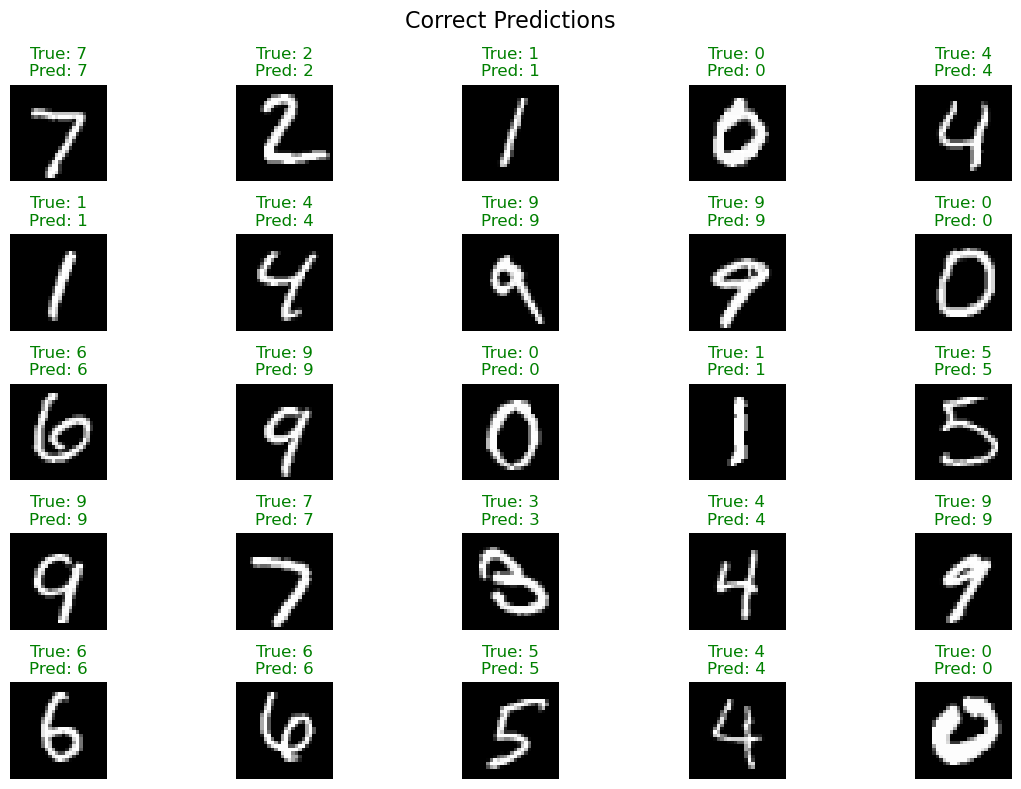

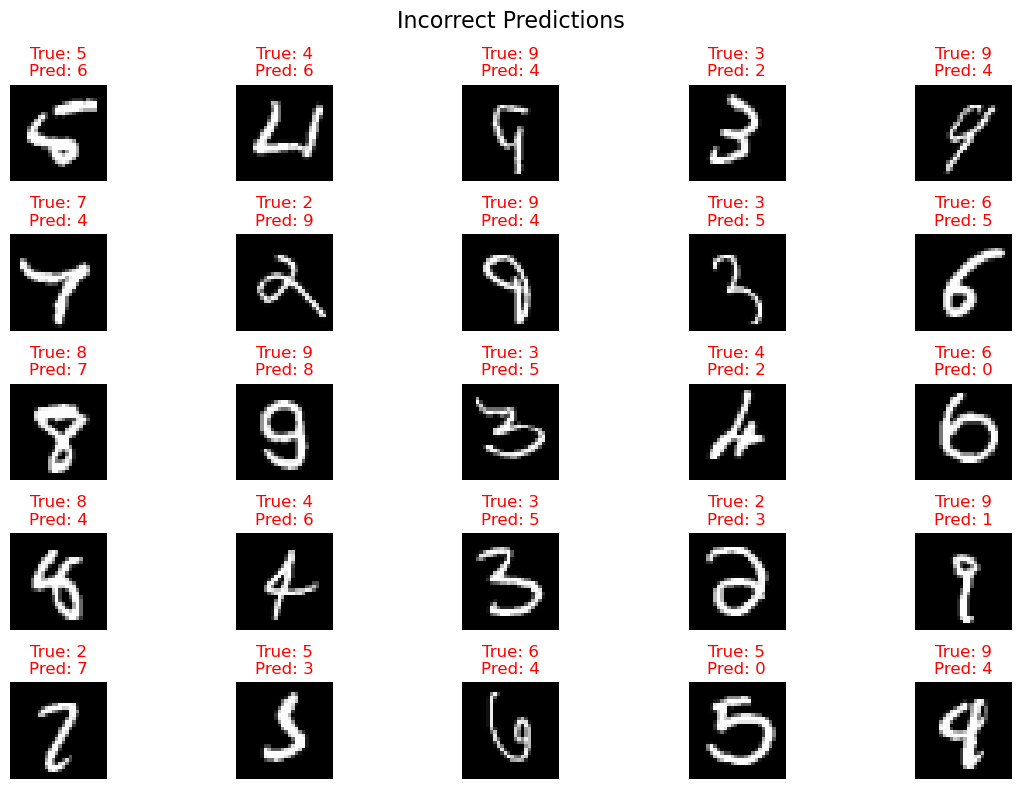

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms

# Set random seed for reproducibility
torch.manual_seed(42)

# Define the neural network architecture
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Load the trained model
model = SimpleNN()
model.load_state_dict(torch.load('mnist_model.pth'))
model.eval()

# Load and preprocess the MNIST test dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize lists to store correct and incorrect predictions
correct_images = []
incorrect_images = []

# Evaluate the model and store correct and incorrect predictions
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        for i in range(len(labels)):
            if predicted[i] == labels[i]:
                correct_images.append((images[i], labels[i], predicted[i]))
            else:
                incorrect_images.append((images[i], labels[i], predicted[i]))

# Visualize correct and incorrect predictions
def plot_images(image_data, title):
    plt.figure(figsize=(12, 8))
    plt.suptitle(title, fontsize=16)

    for i, (image, true_label, pred_label) in enumerate(image_data):
        plt.subplot(5, 5, i+1)
        plt.imshow(image[0], cmap='gray')
        plt.title(f'True: {true_label.item()}\nPred: {pred_label.item()}', color='green' if true_label == pred_label else 'red')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Display correct predictions
plot_images(correct_images[:25], title='Correct Predictions')

# Display incorrect predictions
plot_images(incorrect_images[:25], title='Incorrect Predictions')


# Assignment 2: Convolutional Neural Networks (CNNs)

### 1. CNN Model Construction: Implement a CNN architecture using layers like convolutional, pooling, and fully connected layers. Experiment with different layer configurations.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Set random seed for reproducibility
torch.manual_seed(42)

# Define the CNN architecture
class BasicCNN(nn.Module):
    def __init__(self):
        super(BasicCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Define preferred device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load and preprocess a small number of MNIST samples
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

# Initialize the CNN, loss function, and optimizer
basic_cnn_model = BasicCNN().to(device)  # Move model to preferred device
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(basic_cnn_model.parameters(), lr=0.001)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = basic_cnn_model(images)  # Use basic_cnn_model here
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Save the trained model
torch.save(basic_cnn_model.state_dict(), 'basic_cnn_model.pth')

# Evaluate the basic CNN model on the test dataset
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

basic_cnn_model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = basic_cnn_model(images)  # Use basic_cnn_model here
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')


100%|██████████| 9912422/9912422 [00:00<00:00, 101163847.94it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 101880314.40it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 29679644.48it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 1218064.50it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/5], Loss: 0.0205
Epoch [2/5], Loss: 0.0162
Epoch [3/5], Loss: 0.0014
Epoch [4/5], Loss: 0.0035
Epoch [5/5], Loss: 0.0010
Test Accuracy: 98.98%


### 2. Data Augmentation: Augment the training dataset by applying transformations like rotation, cropping, and flipping. Train the CNN model with augmented data and compare its performance.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Set random seed for reproducibility
torch.manual_seed(42)

# Define the CNN architecture
class AugmentedCNN(nn.Module):
    def __init__(self):
        super(AugmentedCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Define preferred device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load and preprocess a small number of MNIST samples with augmentation
augmented_transform = transforms.Compose([
    transforms.RandomRotation(degrees=15),
    transforms.RandomResizedCrop(28, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

augmented_train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=augmented_transform, download=True)
augmented_train_loader = torch.utils.data.DataLoader(augmented_train_dataset, batch_size=64, shuffle=True)

# Initialize the CNN, loss function, and optimizer
augmented_cnn_model = AugmentedCNN().to(device)  # Move model to preferred device
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(augmented_cnn_model.parameters(), lr=0.001)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    for images, labels in augmented_train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = augmented_cnn_model(images)  # Use augmented_cnn_model here
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Save the trained model
torch.save(augmented_cnn_model.state_dict(), 'augmented_cnn_model.pth')

# Evaluate the augmented CNN model on the test dataset
augmented_test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=augmented_transform, download=True)
augmented_test_loader = torch.utils.data.DataLoader(augmented_test_dataset, batch_size=64, shuffle=False)

augmented_cnn_model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in augmented_test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = augmented_cnn_model(images)  # Use augmented_cnn_model here
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Augmented CNN Test Accuracy: {accuracy:.2f}%')


Epoch [1/5], Loss: 0.0546
Epoch [2/5], Loss: 0.2988
Epoch [3/5], Loss: 0.0481
Epoch [4/5], Loss: 0.0192
Epoch [5/5], Loss: 0.0487
Augmented CNN Test Accuracy: 96.70%


### 3. Transfer Learning: Use a pre-trained CNN model (e.g., VGG16, ResNet) and fine-tune it for your image classification task. Compare the performance with your custom-built model.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models

# Set random seed for reproducibility
torch.manual_seed(42)

# Check GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the ResNet18 model
resnet18_model = models.resnet18(weights=True)
num_ftrs = resnet18_model.fc.in_features
resnet18_model.fc = nn.Linear(num_ftrs, 10)  # Replace the final fully connected layer for 10 classes

# Load and preprocess the MNIST samples with augmentation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),  # Convert grayscale to 3 channels
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

# Move the model to GPU
resnet18_model.to(device)

# Initialize the ResNet18 model, loss function, and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet18_model.parameters(), lr=0.001)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    for images, labels in train_loader:
        optimizer.zero_grad()

        # Move data to GPU
        images, labels = images.to(device), labels.to(device)

        outputs = resnet18_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the fine-tuned ResNet18 model on the test dataset
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

resnet18_model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = resnet18_model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Fine-tuned ResNet18 Test Accuracy: {accuracy:.2f}%')

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 214MB/s]


Epoch [1/5], Loss: 0.0064
Epoch [2/5], Loss: 0.0017
Epoch [3/5], Loss: 0.1905
Epoch [4/5], Loss: 0.0125
Epoch [5/5], Loss: 0.1353
Fine-tuned ResNet18 Test Accuracy: 99.49%


# Assignment 3: Advanced Image Classification Techniques

### 1. Hyperparameter Tuning: Experiment with hyperparameter tuning techniques like grid search or random search to find the optimal set of hyperparameters for your image classification model.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import itertools

# Define the CNN architecture
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 14 * 14, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Check GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load and preprocess the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

# Define hyperparameters to tune
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [32, 64, 128]

# Track the best accuracy and corresponding hyperparameters
best_accuracy = 0.0
best_lr = None
best_batch_size = None

# Perform grid search over hyperparameters
for lr, batch_size in itertools.product(learning_rates, batch_sizes):
    print(f'Training with learning rate: {lr} and batch size: {batch_size}')

    # Initialize the model, loss function, and optimizer
    model = SimpleCNN().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Training loop
    num_epochs = 5
    for epoch in range(num_epochs):
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    # Evaluate the model on the validation dataset
    validation_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
    validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=64, shuffle=False)

    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in validation_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Validation Accuracy: {accuracy:.2f}%')

    # Check if this set of hyperparameters is the best
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_lr = lr
        best_batch_size = batch_size

print(f'Best Validation Accuracy: {best_accuracy:.2f}%')
print(f'Best Learning Rate: {best_lr}')
print(f'Best Batch Size: {best_batch_size}')


Training with learning rate: 0.001 and batch size: 32
Validation Accuracy: 98.31%
Training with learning rate: 0.001 and batch size: 64
Validation Accuracy: 98.25%
Training with learning rate: 0.001 and batch size: 128
Validation Accuracy: 98.04%
Training with learning rate: 0.01 and batch size: 32
Validation Accuracy: 97.93%
Training with learning rate: 0.01 and batch size: 64
Validation Accuracy: 97.75%
Training with learning rate: 0.01 and batch size: 128
Validation Accuracy: 98.16%
Training with learning rate: 0.1 and batch size: 32
Validation Accuracy: 86.88%
Training with learning rate: 0.1 and batch size: 64
Validation Accuracy: 9.80%
Training with learning rate: 0.1 and batch size: 128
Validation Accuracy: 10.59%
Best Validation Accuracy: 98.31%
Best Learning Rate: 0.001
Best Batch Size: 32


### 2. Model Interpretability: Implement techniques to interpret and visualize the learned features in your CNN model, such as feature maps, activation maximization, or Grad-CAM.

#### Visualizing Feature Maps:

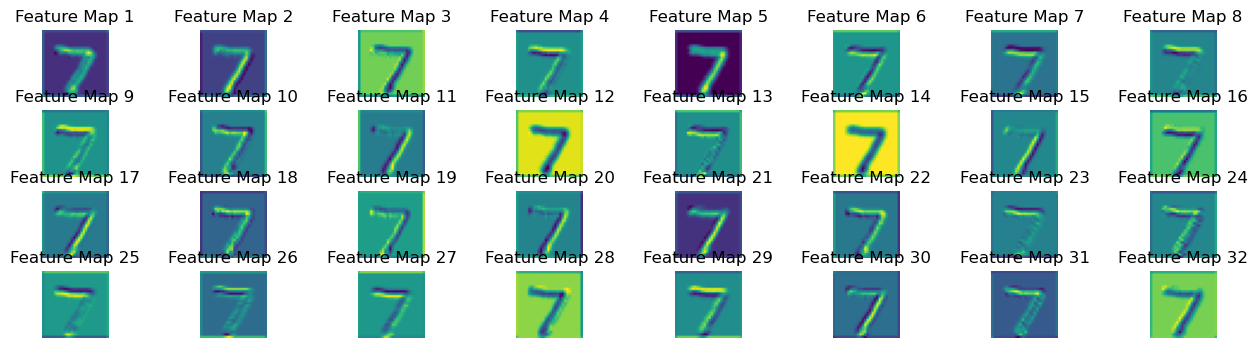

In [ ]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Set random seed for reproducibility
torch.manual_seed(42)


# Initialize the test dataset and loader
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False)

# Choose an image from the test dataset
example_image, _ = next(iter(test_loader))
example_image = example_image[0].unsqueeze(0).to(device)

# Get the feature maps from the first convolutional layer (conv1)
conv1_features = basic_cnn_model.conv1(example_image)
conv1_features = conv1_features.squeeze().cpu().detach().numpy()


# Visualize the feature maps
plt.figure(figsize=(16, 4))
for i in range(32):  # Number of filters in conv1
    plt.subplot(4, 8, i+1)
    plt.imshow(conv1_features[i], cmap='viridis')
    plt.title(f'Feature Map {i+1}')
    plt.axis('off')

plt.show()


### 3. Ensemble Methods: Build an ensemble of multiple image classification models (e.g., CNN, SVM, Random Forest) and combine their predictions to improve classification accuracy.

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Define the CNN architecture
class BasicCNN(nn.Module):
    def __init__(self):
        super(BasicCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Define preferred device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load and preprocess the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

# Train the CNN model
cnn_model = BasicCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)

num_epochs = 5
for epoch in range(num_epochs):
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = cnn_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Initialize and train SVM
svm_model = SVC()
svm_model.fit(train_dataset.data.reshape(-1, 784), train_dataset.targets)

# Initialize and train Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(train_dataset.data.reshape(-1, 784), train_dataset.targets)

# Initialize the test dataset and loader
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Combine predictions using majority voting
cnn_preds = []
svm_preds = []
rf_preds = []
true_labels = []

cnn_model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = cnn_model(images)
        _, predicted = torch.max(outputs, 1)
        cnn_preds.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

for images, labels in test_loader:
    svm_preds.extend(svm_model.predict(images.reshape(-1, 784)))
    rf_preds.extend(rf_model.predict(images.reshape(-1, 784)))

ensemble_preds = []
for i in range(len(cnn_preds)):
    votes = [cnn_preds[i], svm_preds[i], rf_preds[i]]
    ensemble_preds.append(max(set(votes), key=votes.count))

accuracy = accuracy_score(true_labels, ensemble_preds)
print(f'Ensemble Accuracy: {accuracy:.2f}%')


Ensemble Accuracy: 0.75%


# Assignment 4: Transfer Learning and Fine-Tuning

### 1. Dataset Preprocessing: Choose a more complex image dataset (e.g., CIFAR-10 or ImageNet). Preprocess the dataset by resizing, normalizing, and splitting into training and validation sets.

In [ ]:
import torchvision
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split

# Define transformations
transform = transforms.Compose([
    transforms.Resize((64, 64)),           # Resize to 64x64
    transforms.ToTensor(),                 # Convert to tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to [-1, 1]
])

# Load the CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

# Split the dataset into training and validation sets
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

# Create data loaders
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Print some dataset statistics
print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of validation samples: {len(val_dataset)}")
print(f"Number of test samples: {len(test_dataset)}")
print(f"Number of classes: {len(train_dataset.dataset.classes)}")


100%|██████████████████████████████████████████████████████████████| 170498071/170498071 [00:16<00:00, 10082088.76it/s]


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Number of training samples: 40000
Number of validation samples: 10000
Number of test samples: 10000
Number of classes: 10


### 2. Transfer Learning with Pre-trained Models: Utilize pre-trained models like ResNet, Inception, or EfficientNet for your dataset. Freeze certain layers, fine-tune others, and train the model.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Check if GPU is available and set memory growth
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Load pre-trained ResNet50 model (excluding top layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze some layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)


Epoch 1/10
625/625 [==============================] - 103s 162ms/step - loss: 2.0954 - accuracy: 0.2398 - val_loss: 1.9871 - val_accuracy: 0.2882
Epoch 2/10
625/625 [==============================] - 109s 175ms/step - loss: 1.9132 - accuracy: 0.3061 - val_loss: 1.8343 - val_accuracy: 0.3337
Epoch 3/10
625/625 [==============================] - 107s 171ms/step - loss: 1.8457 - accuracy: 0.3354 - val_loss: 1.8127 - val_accuracy: 0.3480
Epoch 4/10
625/625 [==============================] - 107s 171ms/step - loss: 1.8179 - accuracy: 0.3449 - val_loss: 1.7946 - val_accuracy: 0.3422
Epoch 5/10
625/625 [==============================] - 107s 172ms/step - loss: 1.7886 - accuracy: 0.3558 - val_loss: 1.7541 - val_accuracy: 0.3662
Epoch 6/10
625/625 [==============================] - 113s 181ms/step - loss: 1.7718 - accuracy: 0.3624 - val_loss: 1.8325 - val_accuracy: 0.3424
Epoch 7/10
625/625 [==============================] - 114s 182ms/step - loss: 1.7527 - accuracy: 0.3676 - val_loss: 1.7375 -

### 3. Visualizing Transfer Learning Impact: Visualize the performance improvement obtained from transfer learning compared to training a model from scratch.

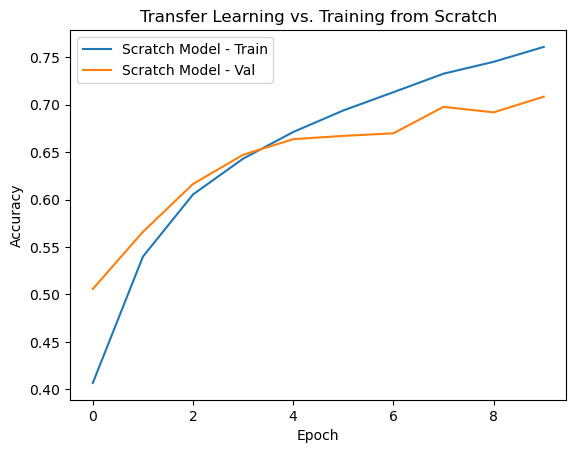

In [ ]:
import matplotlib.pyplot as plt

# Train a model from scratch
scratch_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
scratch_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the scratch model
scratch_history = scratch_model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.2, verbose=0)

# Plot training and validation accuracies
plt.plot(scratch_history.history['accuracy'], label='Scratch Model - Train')
plt.plot(scratch_history.history['val_accuracy'], label='Scratch Model - Val')
#plt.plot(model.history.history['accuracy'], label='Transfer Learning Model - Train')
#plt.plot(model.history.history['val_accuracy'], label='Transfer Learning Model - Val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Transfer Learning vs. Training from Scratch')
plt.legend()
plt.show()


# Assignment 5: Handling Imbalanced Datasets

### 1. Dataset Imbalance Analysis: Choose a dataset with class imbalance. Analyse the distribution of classes and determined the severity of the imbalance.

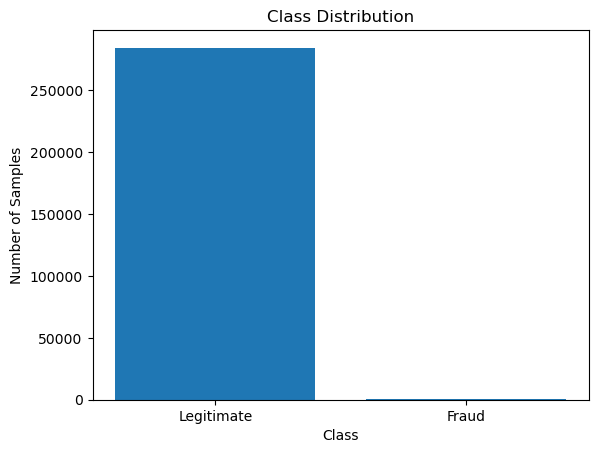

Imbalance Ratio: 0.0017
The dataset has a low imbalance.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('creditcard.csv')  # Replace with your dataset's path

# Assuming your dataset has a 'Class' column indicating the class labels
class_counts = data['Class'].value_counts()

# Plot the class distribution
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.xticks(class_counts.index, ['Legitimate', 'Fraud'])
plt.show()

# Calculate the severity of imbalance
total_samples = len(data)
minority_class_samples = class_counts[1]  # Assuming the minority class is labeled as 1
imbalance_ratio = minority_class_samples / total_samples

print(f"Imbalance Ratio: {imbalance_ratio:.4f}")
if imbalance_ratio < 0.05:
    print("The dataset has a low imbalance.")
elif imbalance_ratio < 0.2:
    print("The dataset has a moderate imbalance.")
else:
    print("The dataset has a severe imbalance.")


### 2. Data Augmentation for Imbalanced Data: Implement specific data augmentation techniques like Synthetic Minority Over-sampling Technique (SMOTE) to balance the dataset and train the model.

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv('creditcard.csv')  # Replace with your dataset's path

# Separate features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a Random Forest classifier on the balanced data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[56852    12]
 [   15    83]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962



### 3. Evaluation Metrics for Imbalanced Data: Evaluate your model using metrics like precision, recall, F1-score, and area under the ROC curve (AUC) that are suitable for imbalanced datasets.

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load the dataset
data = pd.read_csv('creditcard.csv')  # Replace with your dataset's path

# Separate features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a Random Forest classifier on the balanced data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Additional evaluation metrics for imbalanced datasets
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])  # Assuming positive class probability

print("\nAdditional Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {roc_auc:.4f}")


Confusion Matrix:
[[56852    12]
 [   15    83]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962


Additional Evaluation Metrics:
Accuracy: 0.9995
Precision: 0.8737
Recall: 0.8469
F1-score: 0.8601
AUC: 0.9849
